In [1]:
import pandas as pd
from entsoe_utils import calculate_emission_factor, EntsoeData

In [2]:
start = pd.Timestamp('20220101', tz='Europe/Rome')
end = pd.Timestamp('20230101', tz='Europe/Rome')

Italy emission

In [3]:
italy_entsoe = EntsoeData('IT', start, end, range_time_generation="1h")

df_generation_list = []
zones = ['CNOR', 'CSUD', 'SARD', 'SICI', 'SUD']

for zone in zones:
    df_generation = italy_entsoe.get_generation_data(zone_name=zone)
    df_generation_list.append(df_generation)

Index(['Fossil Gas', 'Fossil Oil', 'Other', 'Biomass', 'Geothermal',
       'Hydro Run-of-river and poundage', 'Solar', 'Wind Onshore',
       'Hydro Water Reservoir'],
      dtype='object')
IT_CNOR obtained.
Index(['Fossil Gas', 'Fossil Hard coal', 'Fossil Oil', 'Other', 'Biomass',
       'Hydro Run-of-river and poundage', 'Solar', 'Wind Onshore',
       'Hydro Pumped Storage charge', 'Hydro Water Reservoir'],
      dtype='object')
IT_CSUD obtained.
Index(['Fossil Coal-derived gas', 'Fossil Hard coal', 'Fossil Oil', 'Other',
       'Biomass', 'Hydro Run-of-river and poundage', 'Solar', 'Wind Onshore',
       'Hydro Pumped Storage charge', 'Hydro Water Reservoir'],
      dtype='object')
IT_SARD obtained.
Index(['Fossil Coal-derived gas', 'Fossil Gas', 'Fossil Oil', 'Other',
       'Biomass', 'Hydro Run-of-river and poundage', 'Solar', 'Wind Onshore',
       'Hydro Pumped Storage charge'],
      dtype='object')
IT_SICI obtained.
Index(['Fossil Coal-derived gas', 'Fossil Gas', 'Fossil Ha

['Biomass', 'Fossil Coal-derived gas', 'Fossil Gas', 'Fossil Hard coal', 'Fossil Oil', 'Geothermal', 'Hydro Pumped Storage charge', 'Hydro Run-of-river and poundage', 'Hydro Water Reservoir', 'Other', 'Solar', 'Wind Offshore', 'Wind Onshore']


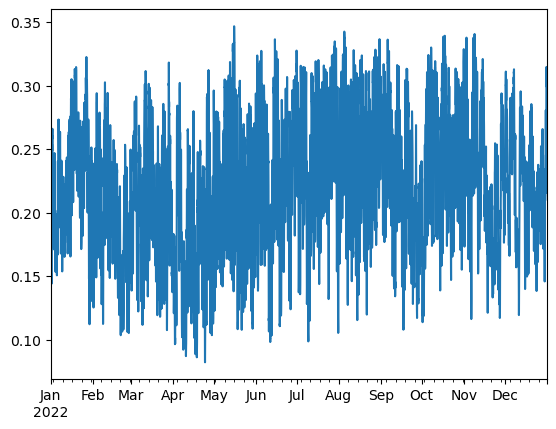

In [4]:
df_aggregated = italy_entsoe.aggregate(df_generation_list)

# calculate the emission factor
df_aggregated = calculate_emission_factor(df_aggregated)

# plot the emission factor
df_aggregated['emission_factor'].plot()

df_aggregated.to_pickle('./pickled_df/emission_IT_2022.pkl')
df_aggregated.to_csv('./df_csv/emission_IT_2022.csv')

Sweden emission

In [5]:
start = pd.Timestamp('2022-01-01 00:00:00', tz='Europe/Stockholm')
end = pd.Timestamp('2023-01-01 01:00:00', tz='Europe/Stockholm')

sweden_entsoe = EntsoeData('SE', start, end, range_time_generation="1h")

df_generation_list = []
zones = ['1', '2', '3', '4']

for zone in zones:
    df_generation = sweden_entsoe.get_generation_data(zone_name=zone)
    df_generation_list.append(df_generation)

Index(['Hydro Water Reservoir', 'Other', 'Solar', 'Wind Onshore'], dtype='object')
SE_1 obtained.
Index(['Fossil Gas', 'Hydro Water Reservoir', 'Other', 'Solar',
       'Wind Onshore'],
      dtype='object')
SE_2 obtained.
Index(['Fossil Gas', 'Hydro Water Reservoir', 'Marine', 'Nuclear', 'Other',
       'Solar', 'Wind Onshore'],
      dtype='object')
SE_3 obtained.
Index(['Fossil Gas', 'Hydro Water Reservoir', 'Other', 'Solar',
       'Wind Onshore'],
      dtype='object')
SE_4 obtained.


In [6]:
df_aggregated = sweden_entsoe.aggregate(df_generation_list)

# calculate the emission factor
df_aggregated = calculate_emission_factor(df_aggregated)
last_ts = df_aggregated.index[-1]
last_row = df_aggregated.iloc[-1]

# compute new timestamp one hour after
new_ts = last_ts + pd.Timedelta(hours=1)

# assign the row at the new index
df_aggregated.loc[new_ts] = last_row

# plot the emission factor
# df_aggregated['emission_factor'].plot()

df_aggregated.to_pickle('./pickled_df/emission_SE_2022.pkl')
df_aggregated.to_csv('./df_csv/emission_SE_2022.csv')

display(df_aggregated)


['Fossil Gas', 'Hydro Water Reservoir', 'Marine', 'Nuclear', 'Other', 'Solar', 'Wind Onshore']


,Fossil Gas,Hydro Water Reservoir,Marine,Nuclear,Other,Solar,Wind Onshore,co2_other,co2_fossilgas,co2_total,emission_factor
2022-01-01 00:00:00+01:00,0.0,7587.0,0.0,5841.0,1304.0,0.0,4014.0,1134.48,0.0,1134.48,0.060519
2022-01-01 01:00:00+01:00,0.0,7016.0,0.0,5842.0,1264.0,0.0,4045.0,1099.68,0.0,1099.68,0.060532
2022-01-01 02:00:00+01:00,0.0,7087.0,0.0,5839.0,1273.0,0.0,4021.0,1107.51,0.0,1107.51,0.060785
2022-01-01 03:00:00+01:00,0.0,7088.0,0.0,5839.0,1278.0,0.0,3949.0,1111.86,0.0,1111.86,0.061246
2022-01-01 04:00:00+01:00,0.0,6746.0,0.0,5840.0,1277.0,0.0,3763.0,1110.99,0.0,1110.99,0.063031
...,...,...,...,...,...,...,...,...,...,...,...
2022-12-31 19:00:00+01:00,0.0,3265.0,0.0,5796.0,681.0,0.0,7186.0,592.47,0.0,592.47,0.034999
2022-12-31 20:00:00+01:00,0.0,3141.0,0.0,5797.0,662.0,0.0,7036.0,575.94,0.0,575.94,0.034620
2022-12-31 21:00:00+01:00,0.0,2619.0,0.0,5797.0,663.0,0.0,6967.0,576.81,0.0,576.81,0.035947
2022-12-31 22:00:00+01:00,0.0,2520.0,0.0,5796.0,650.0,0.0,6628.0,565.50,0.0,565.50,0.036264


Spain emission

In [7]:
spain_entsoe = EntsoeData('ES', start, end, range_time_generation="1h")

df_generation_list = []

df_generation = spain_entsoe.get_generation_data()
df_generation_list.append(df_generation)

Index(['Fossil Brown coal/Lignite', 'Fossil Coal-derived gas', 'Fossil Gas',
       'Fossil Hard coal', 'Fossil Oil', 'Fossil Oil shale', 'Fossil Peat',
       'Other', 'Biomass', 'Geothermal', 'Hydro Run-of-river and poundage',
       'Marine', 'Nuclear', 'Other renewable', 'Solar', 'Waste',
       'Wind Offshore', 'Wind Onshore', 'Hydro Pumped Storage charge',
       'Hydro Water Reservoir'],
      dtype='object')
ES obtained.


['Biomass', 'Fossil Brown coal/Lignite', 'Fossil Coal-derived gas', 'Fossil Gas', 'Fossil Hard coal', 'Fossil Oil', 'Fossil Oil shale', 'Fossil Peat', 'Geothermal', 'Hydro Pumped Storage charge', 'Hydro Run-of-river and poundage', 'Hydro Water Reservoir', 'Marine', 'Nuclear', 'Other', 'Other renewable', 'Solar', 'Waste', 'Wind Offshore', 'Wind Onshore']


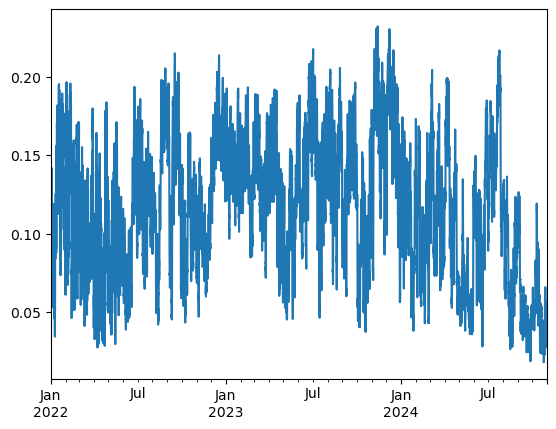

In [8]:
df_aggregated = spain_entsoe.aggregate(df_generation_list)

# calculate the emission factor
df_aggregated = calculate_emission_factor(df_aggregated)

# plot the emission factor
df_aggregated['emission_factor'].plot()

df_aggregated.to_pickle('./pickled_df/emission_ESP_2022.pkl')
df_aggregated.to_csv('./df_csv/emission_ESP_2022.csv')

Austria emission

In [9]:
austria_entsoe = EntsoeData('AT', start, end, range_time_generation="1h")

df_generation_list = []

df_generation = austria_entsoe.get_generation_data()
df_generation_list.append(df_generation)

Index(['Biomass', 'Fossil Gas', 'Fossil Hard coal', 'Fossil Oil', 'Geothermal',
       'Hydro Pumped Storage charge', 'Hydro Run-of-river and poundage',
       'Hydro Water Reservoir', 'Other', 'Other renewable', 'Solar', 'Waste',
       'Wind Onshore'],
      dtype='object')
AT obtained.


['Biomass', 'Fossil Gas', 'Fossil Hard coal', 'Fossil Oil', 'Geothermal', 'Hydro Pumped Storage charge', 'Hydro Run-of-river and poundage', 'Hydro Water Reservoir', 'Other', 'Other renewable', 'Solar', 'Waste', 'Wind Onshore']


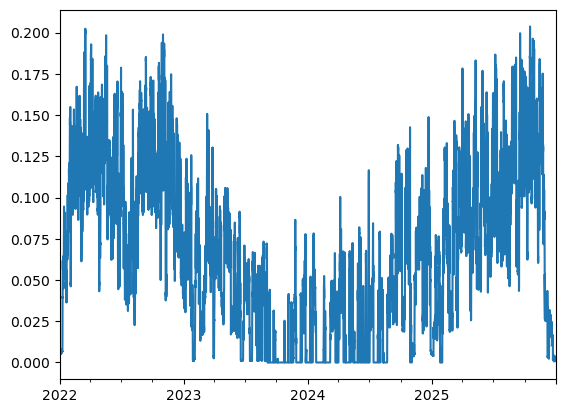

In [10]:
df_aggregated = austria_entsoe.aggregate(df_generation_list)

# calculate the emission factor
df_aggregated = calculate_emission_factor(df_aggregated)

# plot the emission factor
df_aggregated['emission_factor'].plot()

df_aggregated.to_pickle('./pickled_df/emission_AUT_2022.pkl')
df_aggregated.to_csv('./df_csv/emission_AUT_2022.csv')

Spain preprocessing

In [11]:
emission = pd.read_pickle('./pickled_df/emission_ESP_2022.pkl')
emission = emission.iloc[0:8760, :]
display(emission)
emission.to_pickle('./pickled_df/emission_ESP_2022.pkl')
emission.to_csv('./df_csv/emission_ESP_2022.csv')

,Biomass,Fossil Brown coal/Lignite,Fossil Coal-derived gas,Fossil Gas,Fossil Hard coal,Fossil Oil,Fossil Oil shale,Fossil Peat,Geothermal,Hydro Pumped Storage charge,...,Solar,Waste,Wind Offshore,Wind Onshore,co2_other,co2_fossilcoal,co2_fossilgas,co2_fossiloil,co2_total,emission_factor
2022-01-01 00:00:00+01:00,526.0,0.0,0.0,3478.0,867.0,135.0,0.0,0.0,0.0,0.0,...,75.0,269.0,0.0,6342.0,44.37,0.0,1280.9474,74.1015,1399.4189,0.068815
2022-01-01 01:00:00+01:00,533.0,0.0,0.0,3874.0,847.0,121.0,0.0,0.0,0.0,0.0,...,75.0,268.0,0.0,6398.0,43.50,0.0,1426.7942,66.4169,1536.7111,0.073937
2022-01-01 02:00:00+01:00,524.0,0.0,0.0,3557.0,842.0,112.0,0.0,0.0,0.0,0.0,...,75.0,265.0,0.0,6456.0,43.50,0.0,1310.0431,61.4768,1415.0199,0.071246
2022-01-01 03:00:00+01:00,532.0,0.0,0.0,3590.0,855.0,105.0,0.0,0.0,0.0,0.0,...,75.0,266.0,0.0,6144.0,43.50,0.0,1322.1970,57.6345,1423.3315,0.072686
2022-01-01 04:00:00+01:00,528.0,0.0,0.0,3444.0,868.0,105.0,0.0,0.0,0.0,0.0,...,75.0,260.0,0.0,5943.0,44.37,0.0,1268.4252,57.6345,1370.4297,0.071128
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-12-31 19:00:00+01:00,432.0,0.0,0.0,12508.0,1240.0,60.0,0.0,0.0,0.0,0.0,...,8816.0,248.0,0.0,4680.0,45.24,0.0,4606.6964,32.9340,4684.8704,0.129976
2022-12-31 20:00:00+01:00,456.0,0.0,0.0,13000.0,1240.0,60.0,0.0,0.0,0.0,0.0,...,8312.0,252.0,0.0,4720.0,45.24,0.0,4787.9000,32.9340,4866.0740,0.134630
2022-12-31 21:00:00+01:00,460.0,0.0,0.0,13484.0,1240.0,60.0,0.0,0.0,0.0,0.0,...,7780.0,256.0,0.0,4752.0,45.24,0.0,4966.1572,32.9340,5044.3312,0.139408
2022-12-31 22:00:00+01:00,428.0,0.0,0.0,13584.0,1240.0,60.0,0.0,0.0,0.0,0.0,...,7520.0,252.0,0.0,4896.0,45.24,0.0,5002.9872,32.9340,5081.1612,0.140924


Austria preprocessing

In [12]:
emission = pd.read_pickle('./pickled_df/emission_AUT_2022.pkl')
emission = emission.iloc[0:8760, :]
display(emission)
emission.to_pickle('./pickled_df/emission_AUT_2022.pkl')
emission.to_csv('./df_csv/emission_AUT_2022.csv')

,Biomass,Fossil Gas,Fossil Hard coal,Fossil Oil,Geothermal,Hydro Pumped Storage charge,Hydro Run-of-river and poundage,Hydro Water Reservoir,Other,Other renewable,Solar,Waste,Wind Onshore,co2_other,co2_fossilgas,co2_fossiloil,co2_total,emission_factor
2022-01-01 00:00:00+01:00,336.0,94.0,0.0,0.0,0.0,0.0,3828.0,355.0,0.0,0.0,0.0,100.0,2096.0,0.0,34.6202,0.0,34.6202,0.005084
2022-01-01 01:00:00+01:00,336.0,91.0,0.0,0.0,0.0,0.0,3778.0,360.0,0.0,0.0,0.0,100.0,2404.0,0.0,33.5153,0.0,33.5153,0.004741
2022-01-01 02:00:00+01:00,336.0,93.0,0.0,0.0,0.0,0.0,3780.0,371.0,0.0,0.0,0.0,100.0,2504.0,0.0,34.2519,0.0,34.2519,0.004768
2022-01-01 03:00:00+01:00,332.0,92.0,0.0,0.0,0.0,0.0,3783.0,375.0,0.0,0.0,0.0,100.0,2636.0,0.0,33.8836,0.0,33.8836,0.004630
2022-01-01 04:00:00+01:00,332.0,92.0,0.0,0.0,0.0,0.0,3765.0,320.0,0.0,0.0,0.0,100.0,2640.0,0.0,33.8836,0.0,33.8836,0.004674
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-12-31 19:00:00+01:00,312.0,696.0,0.0,0.0,0.0,0.0,2471.0,140.0,0.0,0.0,0.0,100.0,1896.0,0.0,256.3368,0.0,256.3368,0.045652
2022-12-31 20:00:00+01:00,312.0,731.0,0.0,0.0,0.0,0.0,2426.0,148.0,0.0,0.0,0.0,100.0,1892.0,0.0,269.2273,0.0,269.2273,0.047999
2022-12-31 21:00:00+01:00,308.0,748.0,0.0,0.0,0.0,0.0,2412.0,148.0,0.0,0.0,0.0,100.0,1960.0,0.0,275.4884,0.0,275.4884,0.048536
2022-12-31 22:00:00+01:00,308.0,767.0,0.0,0.0,0.0,0.0,2421.0,112.0,0.0,0.0,0.0,100.0,2040.0,0.0,282.4861,0.0,282.4861,0.049145
